In [1]:
import os

os.environ["KERAS_BACKEND"] = "torch"

In [2]:
import tensorflow as tf

print("Version TF:", tf.__version__)
print("Dispositivos físicos:", tf.config.list_physical_devices())
print("Build:", tf.sysconfig.get_build_info())
print("GPUs disponibles:", tf.config.list_physical_devices('GPU'))
print(tf.test.gpu_device_name())



Version TF: 2.16.1
Dispositivos físicos: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Build: OrderedDict({'is_cuda_build': False, 'is_rocm_build': False, 'is_tensorrt_build': False})
GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
/device:GPU:0


2025-08-31 14:30:51.681604: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-08-31 14:30:51.681634: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-08-31 14:30:51.681639: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-08-31 14:30:51.681669: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-31 14:30:51.681679: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

!unzip -q kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0  43.0M      0  0:00:18  0:00:18 --:--:-- 38.1M      0  0:01:17  0:00:01  0:01:16 10.1M


In [3]:
DATASET_PATH = "/Users/juandiego/Documents/study/tensorflow/image_rating/PetImages"

def filter_images():
    deleted_imgs = 0
    for folder_name in ("Cat", "Dog"):
        folder_path = os.path.join(DATASET_PATH, folder_name)
        for image in os.listdir(folder_path):
            img_path = os.path.join(folder_path, image)
            try:
                fobj = open(img_path, "rb")
                is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
            finally:
                fobj.close()
            if not is_jfif:
                deleted_imgs += 1
                os.remove(img_path)
    print(f"Imagenes eliminadas: {deleted_imgs}")

In [4]:
filter_images()

Imagenes eliminadas: 0


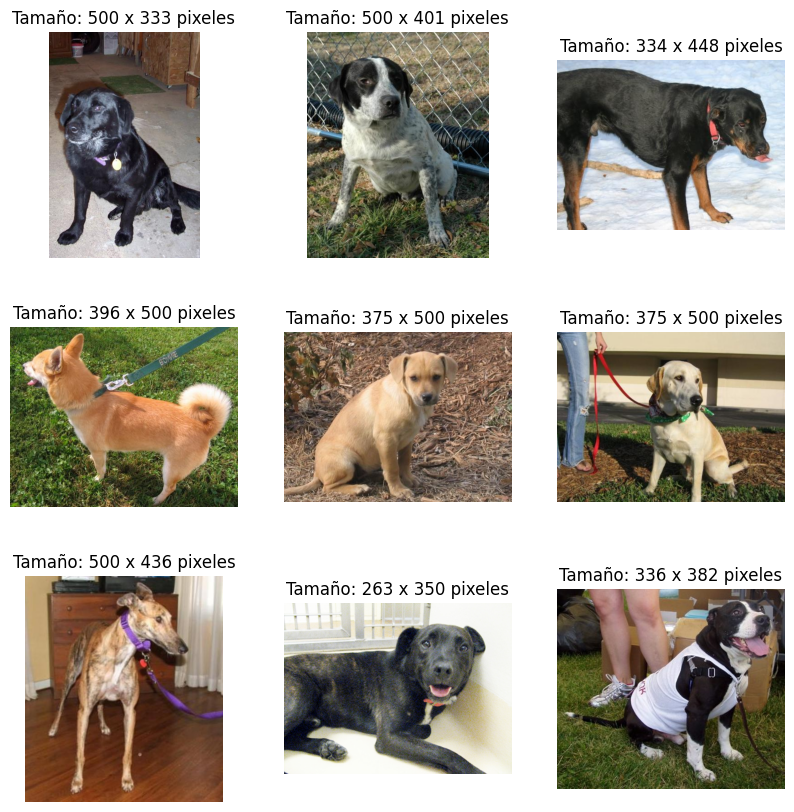

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(10, 10))
folder_path = os.path.join(DATASET_PATH, "Dog")
for i, image in enumerate(os.listdir(folder_path)[:9]):
    img_path = os.path.join(folder_path, image)
    img = mpimg.imread(img_path)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Tamaño: {img.shape[:2][0]} x {img.shape[:2][1]} pixeles")
    plt.axis("off")
    
plt.show()

In [6]:
from tensorflow import keras

image_size = (180, 180)
batch_size = 128

train_ds = keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.


2025-08-31 14:31:03.449964: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-31 14:31:03.449984: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


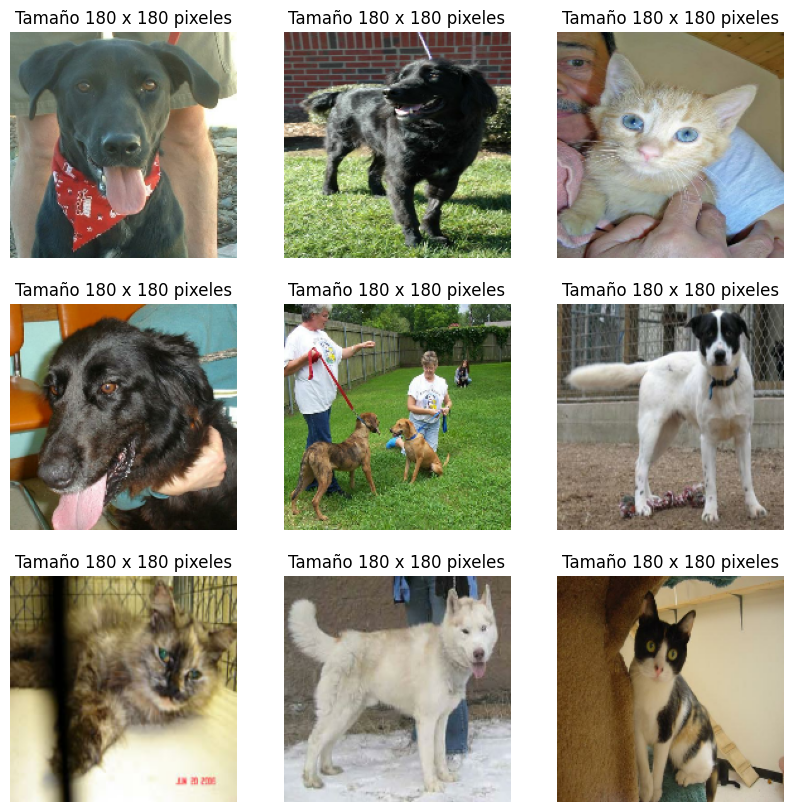

2025-08-31 14:31:05.540828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Tamaño {images[i].shape[0]} x {images[i].shape[1]} pixeles")
        plt.axis("off")
        
    plt.show()

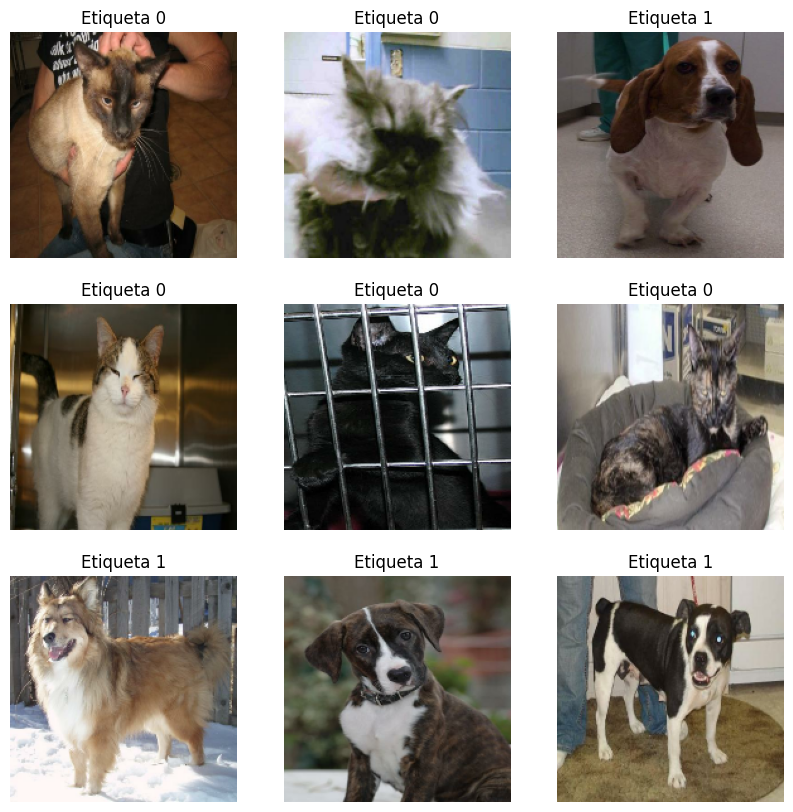

2025-08-31 14:31:07.763643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
plt.figure(figsize=(10, 10))

for img, etiqueta in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(f"Etiqueta {etiqueta[i]}")
        plt.axis("off")
        
    plt.show()



In [9]:
temp_val_ds = keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


In [10]:
val_size = int(0.5 * len(temp_val_ds))
val_size

18

In [11]:
val_ds = temp_val_ds.take(val_size)
test_ds = temp_val_ds.skip(val_size)

print(len(val_ds))
print(len(test_ds))

18
19


In [12]:
val_ds_sk = list(temp_val_ds)

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
2025-08-31 14:31:17.812395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [13]:
from sklearn.model_selection import train_test_split

val_ds_sk, test_ds_sk = train_test_split(
    val_ds_sk,
    test_size=0.5,
    random_state=42
)

In [20]:
from datasets import load_dataset

ds = load_dataset("cats_vs_dogs")
print(ds)

Generating train split: 100%|██████████| 23410/23410 [00:00<00:00, 33177.01 examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 23410
    })
})


In [15]:
from keras import layers, models

image_size = (180, 180)
input_shape = image_size + (3,)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

cnn_model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1.0/255, input_shape=input_shape),

    # Bloque 1
    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D(),

    # Bloque 2
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D(),

    # Bloque 3
    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D(),

    # Bloque 4
    layers.Conv2D(256, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D(),

    # Clasificación
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

cnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [17]:
history = cnn_model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
  3/147 ━━━━━━━━━━━━━━━━━━━━ 3:10 1s/step - accuracy: 0.4965 - loss: 0.7013

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 74/147 ━━━━━━━━━━━━━━━━━━━━ 1:35 1s/step - accuracy: 0.5125 - loss: 0.6948

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 93/147 ━━━━━━━━━━━━━━━━━━━━ 1:10 1s/step - accuracy: 0.5210 - loss: 0.6928

105/147 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5257 - loss: 0.6915

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


112/147 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.5284 - loss: 0.6908

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


114/147 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5291 - loss: 0.6905

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


122/147 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5320 - loss: 0.6897

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5402 - loss: 0.6871

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.5858 - loss: 0.6713 - val_accuracy: 0.6454 - val_loss: 0.6265
Epoch 2/10


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 84/147 ━━━━━━━━━━━━━━━━━━━━ 1:21 1s/step - accuracy: 0.6385 - loss: 0.6303

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 ━━━━━━━━━━━━━━━━━━━━ 1:20 1s/step - accuracy: 0.6385 - loss: 0.6303

105/147 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.6394 - loss: 0.6299

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


107/147 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6395 - loss: 0.6299

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


112/147 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.6398 - loss: 0.6297

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6415 - loss: 0.6290

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.6486 - loss: 0.6257 - val_accuracy: 0.6931 - val_loss: 0.5934
Epoch 3/10
 13/147 ━━━━━━━━━━━━━━━━━━━━ 2:52 1s/step - accuracy: 0.6859 - loss: 0.5957

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 77/147 ━━━━━━━━━━━━━━━━━━━━ 1:30 1s/step - accuracy: 0.6707 - loss: 0.6073

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 80/147 ━━━━━━━━━━━━━━━━━━━━ 1:26 1s/step - accuracy: 0.6705 - loss: 0.6075

106/147 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.6690 - loss: 0.6089

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


108/147 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6689 - loss: 0.6090

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


112/147 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.6688 - loss: 0.6091

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6680 - loss: 0.6095

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.6656 - loss: 0.6103 - val_accuracy: 0.7079 - val_loss: 0.5709
Epoch 4/10


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 75/147 ━━━━━━━━━━━━━━━━━━━━ 1:33 1s/step - accuracy: 0.6697 - loss: 0.6031

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


100/147 ━━━━━━━━━━━━━━━━━━━━ 1:00 1s/step - accuracy: 0.6679 - loss: 0.6053

108/147 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6677 - loss: 0.6057

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


109/147 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.6677 - loss: 0.6057

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


114/147 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6676 - loss: 0.6058

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


124/147 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.6675 - loss: 0.6062

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6674 - loss: 0.6068

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.6673 - loss: 0.6098 - val_accuracy: 0.7153 - val_loss: 0.5669
Epoch 5/10
  9/147 ━━━━━━━━━━━━━━━━━━━━ 2:58 1s/step - accuracy: 0.6983 - loss: 0.5771

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 82/147 ━━━━━━━━━━━━━━━━━━━━ 1:23 1s/step - accuracy: 0.6899 - loss: 0.5836

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 93/147 ━━━━━━━━━━━━━━━━━━━━ 1:09 1s/step - accuracy: 0.6897 - loss: 0.5835

110/147 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.6897 - loss: 0.5835

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


112/147 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.6897 - loss: 0.5835

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


117/147 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6897 - loss: 0.5835

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


118/147 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6897 - loss: 0.5835

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6895 - loss: 0.5840

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.6875 - loss: 0.5878 - val_accuracy: 0.7209 - val_loss: 0.5739
Epoch 6/10


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 72/147 ━━━━━━━━━━━━━━━━━━━━ 1:36 1s/step - accuracy: 0.6881 - loss: 0.5852

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 82/147 ━━━━━━━━━━━━━━━━━━━━ 1:23 1s/step - accuracy: 0.6876 - loss: 0.5856

103/147 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6865 - loss: 0.5867

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


106/147 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.6863 - loss: 0.5868

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


107/147 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6863 - loss: 0.5868

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6854 - loss: 0.5879

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.6832 - loss: 0.5911 - val_accuracy: 0.6497 - val_loss: 0.6029
Epoch 7/10
 18/147 ━━━━━━━━━━━━━━━━━━━━ 2:47 1s/step - accuracy: 0.6761 - loss: 0.5854

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 80/147 ━━━━━━━━━━━━━━━━━━━━ 1:26 1s/step - accuracy: 0.6851 - loss: 0.5874

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 89/147 ━━━━━━━━━━━━━━━━━━━━ 1:15 1s/step - accuracy: 0.6856 - loss: 0.5870

101/147 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6861 - loss: 0.5865 

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


107/147 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6863 - loss: 0.5864

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


112/147 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.6864 - loss: 0.5863

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


115/147 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6864 - loss: 0.5863

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6863 - loss: 0.5863

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.6849 - loss: 0.5873 - val_accuracy: 0.6576 - val_loss: 0.6051
Epoch 8/10
 12/147 ━━━━━━━━━━━━━━━━━━━━ 2:54 1s/step - accuracy: 0.6785 - loss: 0.6051

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 75/147 ━━━━━━━━━━━━━━━━━━━━ 47:52 40s/step - accuracy: 0.6843 - loss: 0.5958

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


104/147 ━━━━━━━━━━━━━━━━━━━━ 20:47 29s/step - accuracy: 0.6855 - loss: 0.5939

105/147 ━━━━━━━━━━━━━━━━━━━━ 20:07 29s/step - accuracy: 0.6855 - loss: 0.5939

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


109/147 ━━━━━━━━━━━━━━━━━━━━ 17:35 28s/step - accuracy: 0.6856 - loss: 0.5937

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


111/147 ━━━━━━━━━━━━━━━━━━━━ 16:24 27s/step - accuracy: 0.6857 - loss: 0.5935

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


116/147 ━━━━━━━━━━━━━━━━━━━━ 13:36 26s/step - accuracy: 0.6859 - loss: 0.5933

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 27s/step - accuracy: 0.6868 - loss: 0.5918 

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 3987s 27s/step - accuracy: 0.6912 - loss: 0.5856 - val_accuracy: 0.7244 - val_loss: 0.5479
Epoch 9/10


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 83/147 ━━━━━━━━━━━━━━━━━━━━ 3:14 3s/step - accuracy: 0.6886 - loss: 0.5865

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


102/147 ━━━━━━━━━━━━━━━━━━━━ 2:09 3s/step - accuracy: 0.6890 - loss: 0.5855

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


110/147 ━━━━━━━━━━━━━━━━━━━━ 1:45 3s/step - accuracy: 0.6893 - loss: 0.5851

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


112/147 ━━━━━━━━━━━━━━━━━━━━ 1:39 3s/step - accuracy: 0.6893 - loss: 0.5850

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6896 - loss: 0.5843

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 488s 3s/step - accuracy: 0.6897 - loss: 0.5837 - val_accuracy: 0.7201 - val_loss: 0.5588
Epoch 10/10
  1/147 ━━━━━━━━━━━━━━━━━━━━ 14:11 6s/step - accuracy: 0.6797 - loss: 0.5690

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 72/147 ━━━━━━━━━━━━━━━━━━━━ 5:46 5s/step - accuracy: 0.6986 - loss: 0.5683

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 84/147 ━━━━━━━━━━━━━━━━━━━━ 4:40 4s/step - accuracy: 0.6990 - loss: 0.5682

106/147 ━━━━━━━━━━━━━━━━━━━━ 2:55 4s/step - accuracy: 0.6995 - loss: 0.5682

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


108/147 ━━━━━━━━━━━━━━━━━━━━ 2:46 4s/step - accuracy: 0.6995 - loss: 0.5683

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


116/147 ━━━━━━━━━━━━━━━━━━━━ 2:10 4s/step - accuracy: 0.6993 - loss: 0.5686

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


119/147 ━━━━━━━━━━━━━━━━━━━━ 1:57 4s/step - accuracy: 0.6992 - loss: 0.5687

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6986 - loss: 0.5698

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


147/147 ━━━━━━━━━━━━━━━━━━━━ 611s 4s/step - accuracy: 0.6971 - loss: 0.5744 - val_accuracy: 0.7157 - val_loss: 0.5476


In [18]:
cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (128, 180, 180, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (128, 180, 180, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (128, 180, 180, 32)    │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (128, 90, 90, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (128, 90, 90, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (128, 45, 45, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (128, 45, 45, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (128, 22, 22, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (128, 22, 22, 256)     │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (128, 11, 11, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (128, 30976)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (128, 256)             │     7,930,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (128, 256)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (128, 1)               │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,956,357 (95.20 MB)

 Trainable params: 8,318,785 (31.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,637,572 (63.47 MB)

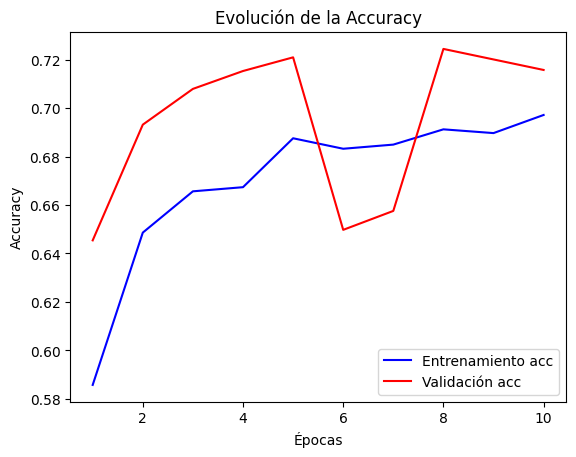

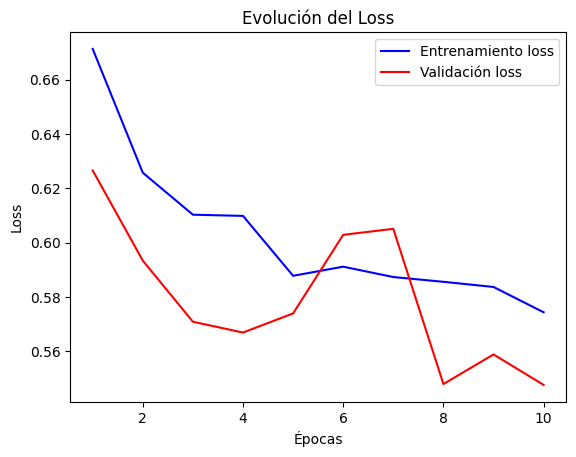

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Entrenamiento acc')
plt.plot(epochs, val_acc, 'r', label='Validación acc')
plt.title('Evolución de la Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Entrenamiento loss')
plt.plot(epochs, val_loss, 'r', label='Validación loss')
plt.title('Evolución del Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
cnn_model.save("model_cnn_cats_vs_dogs.keras")

In [29]:
cnn_model_disk = keras.models.load_model("model_cnn_cats_vs_dogs.keras")

In [ ]:
evaluation_result = cnn_model.evaluate(test_ds)

print("loss: ", evaluation_result[0])
print("accuracy: ", evaluation_result[1])

In [ ]:
plt.figure(figsize=(10, 10))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = fcnn_model_disk.predict(tf.expand_dims(images[i], 0))
        score = float(predictions[0])
        plt.title(f"Cat: {100 * (1 - score):.2f}%, Dog: {100 * score:.2f}%")
        plt.axis("off")

plt.show()